In [42]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [43]:
b = -1
c = 60

t_del = 0.1

time = np.arange(0, 5.1, t_del)
y = [None] * len(time)
y[0] = 1
y_d = [None] * len(time)
y_d[0] = 0
y_dd = [np.nan] * len(time)

y_dd[0] = -(b * y_d[0]) - (c * y[0])

df_og = pd.DataFrame({'time': time, 'y': y, 'y_d': y_d, 'y_dd': y_dd})


def get_y_d(df, index, t_del):
    # t_del = df.loc[index, 'time'] - df.loc[index-1, 'time']
    return df.loc[index-1, 'y_d'] + (t_del * df.loc[index-1, 'y_dd'])

def get_y(df, index, t_del):
    # t_del = df.loc[index, 'time'] - df.loc[index-1, 'time']
    y_d_diff = df.loc[index, 'y_d'] - df.loc[index-1, 'y_d']
    return df.loc[index-1, 'y'] + ((t_del) * (y_d_diff / 2)) + (((t_del**2)/2) * df.loc[index-1, 'y_dd'])

def get_y_dd(df, index):
    return -(b * df.loc[index, 'y_d']) - (c * df.loc[index, 'y'])


for index, row in df.iterrows():
    if index == 0:
        continue
    else:
        df_og.loc[index, 'y_d'] = get_y_d(df=df_og, index=index, t_del=t_del)
        df_og.loc[index, 'y'] = get_y(df=df_og, index=index, t_del=t_del)
        df_og.loc[index, 'y_dd'] = get_y_dd(df=df_og, index=index)


df_og

,time,y,y_d,y_dd
0,0.0,1.000000,0.000000,-6.000000e+01
1,0.1,0.400000,-6.000000,-3.000000e+01
2,0.2,0.100000,-9.000000,-1.500000e+01
3,0.3,-0.050000,-10.500000,-7.500000e+00
4,0.4,-0.125000,-11.250000,-3.750000e+00
5,0.5,-0.162500,-11.625000,-1.875000e+00
6,0.6,-0.181250,-11.812500,-9.375000e-01
7,0.7,-0.190625,-11.906250,-4.687500e-01
8,0.8,-0.195313,-11.953125,-2.343750e-01
9,0.9,-0.197656,-11.976562,-1.171875e-01


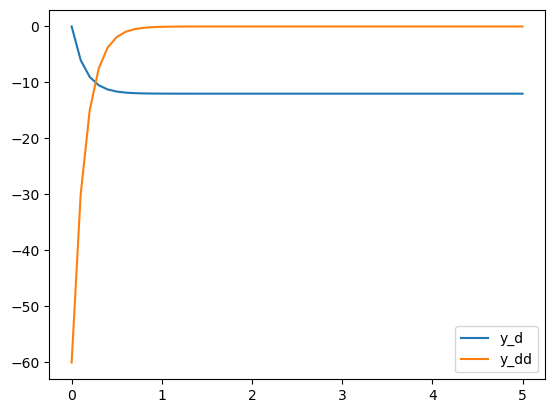

In [44]:
plt.plot(df_og['time'], df_og['y_d'], label='y_d')
plt.plot(df_og['time'], df_og['y_dd'], label='y_dd')
plt.legend()
plt.show()